<a href="https://colab.research.google.com/github/mohit579-pixel/SL-3/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv("Network_Ads.csv")

In [5]:
df.shape

(400, 5)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop(['User ID'],axis=1,inplace=True)

In [8]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
df.Gender.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [10]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

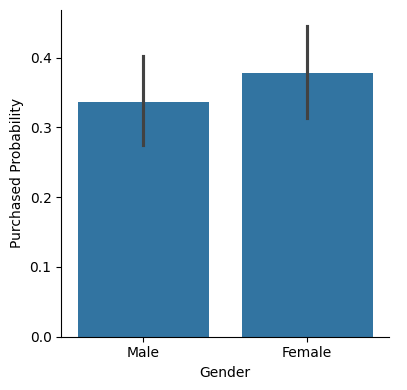

In [12]:
g = sns.catplot(x = "Gender",y = "Purchased",data = df,kind = "bar",height = 4)
g.set_ylabels("Purchased Probability")
plt.show

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


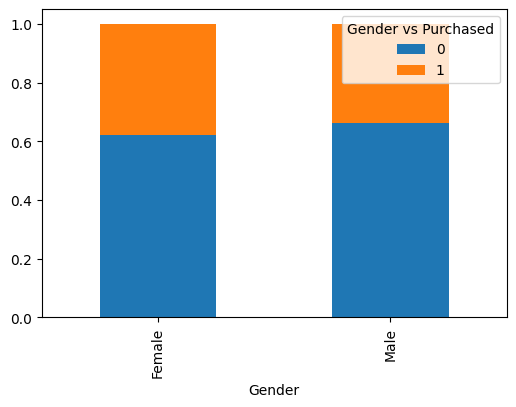

In [13]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

In [14]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':1})

ValueError: could not convert string to float: 'Male'

In [ ]:
X=df.drop(['Gender','Purchased'],axis=1)
Y= df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # replace 42 with any desired integer value
# Success
print("Training and testing split was successful.")


Training and testing split was successful.


In [ ]:
from sklearn.linear_model import LogisticRegression
basemodel= LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:", basemodel.score(X_train,y_train)*100)

Training accuracy: 83.75


In [ ]:
y_predict= basemodel.predict(X_test)
print("Testing accuracy:", basemodel.score(X_test,y_test)*100)

Testing accuracy: 88.75


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
X = df[['Age', 'EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2)
print("Training and testing split was successful.")

Training and testing split was successful.


In [ ]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 84.375
Testing accuracy: 75.0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
prf = precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.76666667 0.7       ]
Recall: [0.88461538 0.5       ]
fscore: [0.82142857 0.58333333]
support: [52 28]
